#Tasca 6: Visualització gràfica d'un dataset

##Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# He pujat el dataset de la tasca 5 a una carpeta de Google Drive

df = pd.read_csv('/content/drive/MyDrive/ITAcademy/clean_DelayedFlights.csv',
                 index_col=0, parse_dates = ['DateTime'], dtype={'FlightNum':'str'})

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DateTime           datetime64[ns]
 1   UniqueCarrier      object        
 2   FlightNum          object        
 3   Origin             object        
 4   Dest               object        
 5   Distance           int64         
 6   AvgSpeed           float64       
 7   ArrIsDelayed       bool          
 8   ArrDelay           float64       
 9   DepDelay           float64       
 10  ActualElapsedTime  float64       
 11  CRSElapsedTime     float64       
 12  ElapsedTimeError   float64       
 13  AirTime            float64       
 14  AirTimeProportion  float64       
 15  Diverted           bool          
 16  CarrierDelay       float64       
 17  WeatherDelay       float64       
 18  NASDelay           float64       
 19  SecurityDelay      float64       
 20  LateAircraftDelay  float

In [5]:
df.head()

,DateTime,UniqueCarrier,FlightNum,Origin,Dest,Distance,AvgSpeed,ArrIsDelayed,ArrDelay,DepDelay,ActualElapsedTime,CRSElapsedTime,ElapsedTimeError,AirTime,AirTimeProportion,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03 19:55:00,WN,0335,IAD,TPA,810,418.965517,False,-14.0,8.0,128.0,150.0,-22.0,116.0,0.906250,False,NaN,NaN,NaN,NaN,NaN
1,2008-01-03 07:35:00,WN,3231,IAD,TPA,810,430.088496,False,2.0,19.0,128.0,145.0,-17.0,113.0,0.882812,False,NaN,NaN,NaN,NaN,NaN
2,2008-01-03 06:20:00,WN,0448,IND,BWI,515,406.578947,False,14.0,8.0,96.0,90.0,6.0,76.0,0.791667,False,NaN,NaN,NaN,NaN,NaN
4,2008-01-03 17:55:00,WN,3920,IND,BWI,515,401.298701,True,34.0,34.0,90.0,90.0,0.0,77.0,0.855556,False,2.0,0.0,0.0,0.0,32.0
5,2008-01-03 19:15:00,WN,0378,IND,JAX,688,474.482759,False,11.0,25.0,101.0,115.0,-14.0,87.0,0.861386,False,NaN,NaN,NaN,NaN,NaN


In [6]:
# Configuració general de les gràfiques
sns.set_theme(context='notebook', 
              style='whitegrid', 
              palette='deep', 
              font='sans-serif', 
              font_scale=1, 
              color_codes=True, 
              rc=None);

plt.rcParams["figure.figsize"] = (16, 10)

In [8]:
# Anem guardant els punters a les diferents gràfiques en un diccionari 'totes_imatges'
# per poder-les guardar totes al final
# El diccionari té la forma:  nom_de_la_gràfica : figura
totes_imatges = dict()

### Una variable categòrica (UniqueCarrier)

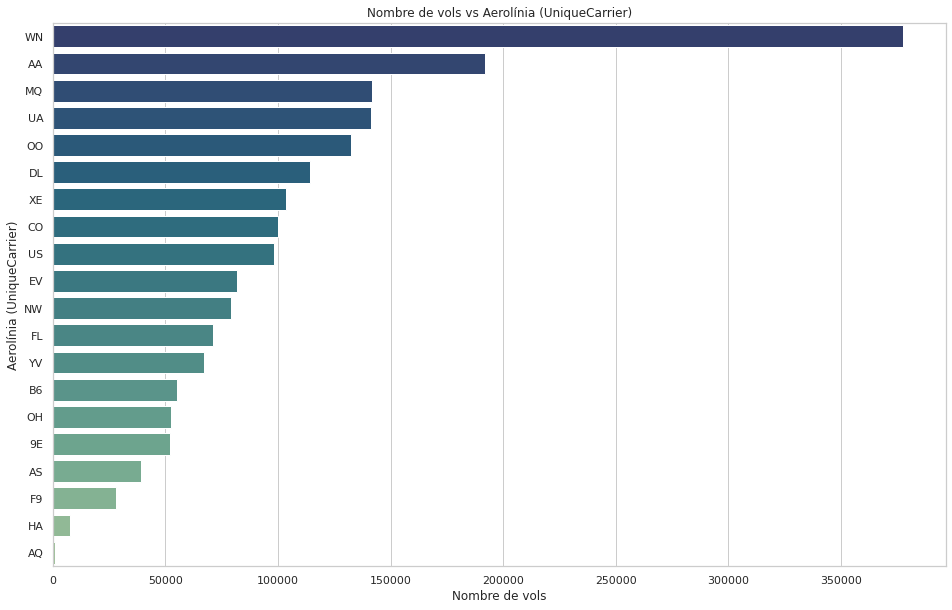

In [9]:
imatge1 = sns.countplot(y="UniqueCarrier",
                        data=df,
                        order = df.UniqueCarrier.value_counts().index,
                        palette = 'crest_r')

plt.title('Nombre de vols vs Aerolínia (UniqueCarrier)')
plt.ylabel('Aerolínia (UniqueCarrier)')
plt.xlabel('Nombre de vols')

totes_imatges["FlightCount_vs_UniqueCarrier"] = imatge1.get_figure()

### Una variable numèrica (ArrDelay)


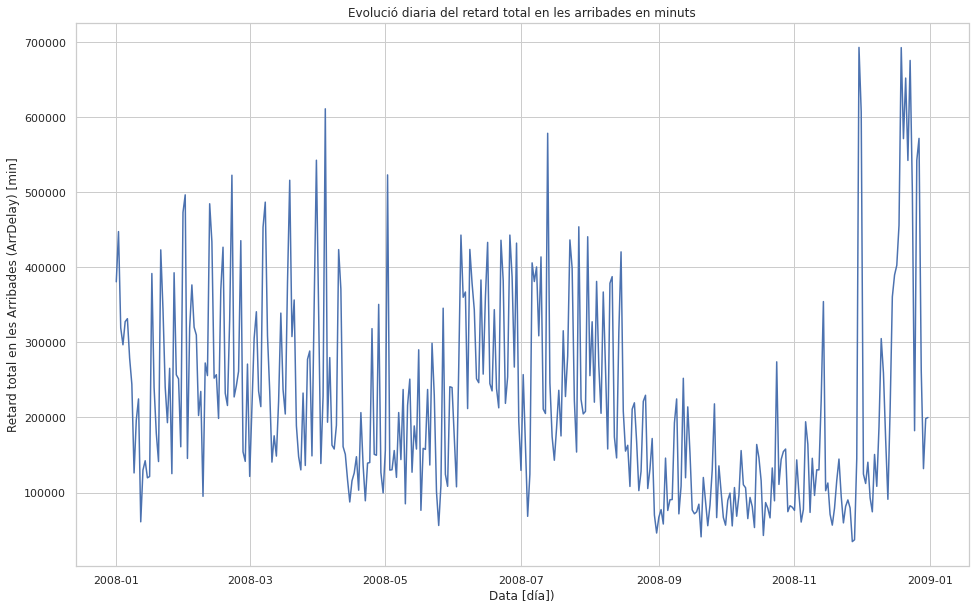

In [10]:
imatge2 = sns.lineplot(data=df.groupby(df.DateTime.dt.date).sum(),
             x='DateTime',y='ArrDelay')
plt.title('Evolució diaria del retard total en les arribades en minuts')
plt.xlabel('Data [día])')
plt.ylabel('Retard total en les Arribades (ArrDelay) [min]')

totes_imatges["TotalArrDelay_vs_Day"] = imatge2.get_figure()

### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)


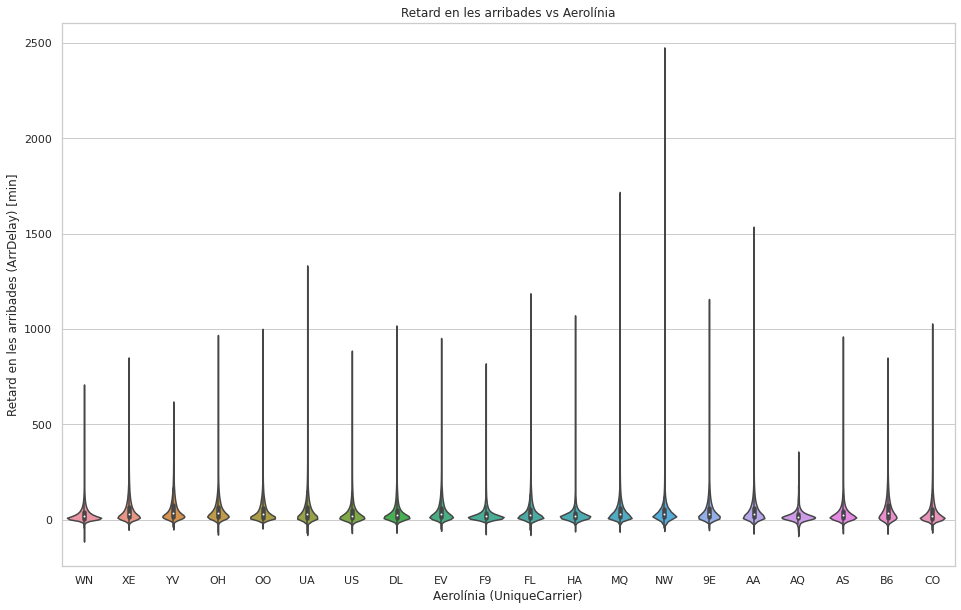

In [14]:
imatge3 = sns.violinplot(x="UniqueCarrier", y="ArrDelay", data=df)
plt.title('Retard en les arribades vs Aerolínia')
plt.xlabel('Aerolínia (UniqueCarrier)')
plt.ylabel('Retard en les arribades (ArrDelay) [min]')

totes_imatges["ArrDelay_vs_UniqueCarrier"] = imatge3.get_figure()

### Dues variables numèriques (ArrDelay i DepDelay)


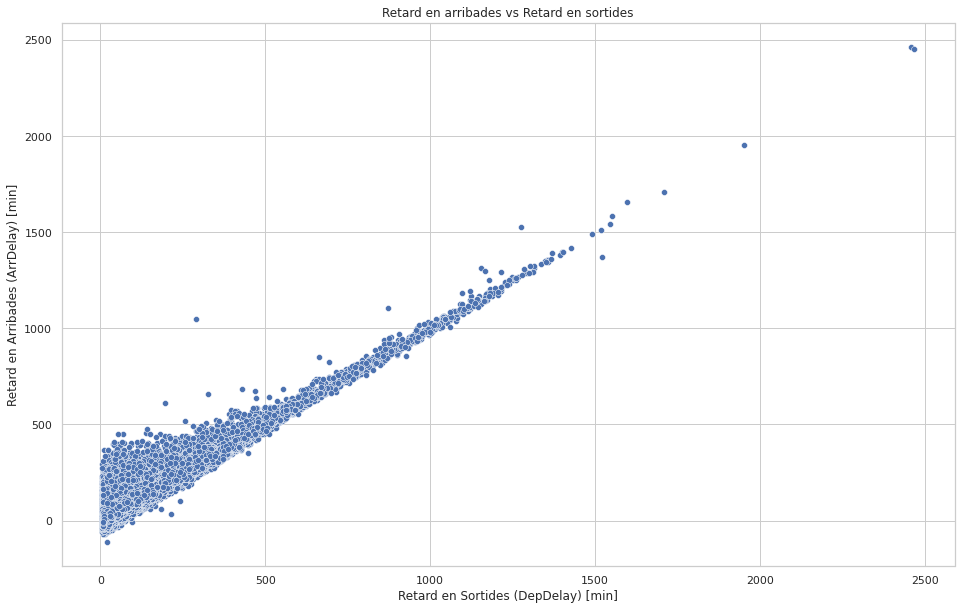

In [16]:
imatge4 = sns.scatterplot(x="DepDelay", y="ArrDelay", data=df)
plt.title('Retard en arribades vs Retard en sortides')
plt.xlabel('Retard en Sortides (DepDelay) [min]')
plt.ylabel('Retard en Arribades (ArrDelay) [min]')

totes_imatges["ArrDelay_vs_DepDelay"] = imatge4.get_figure()

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

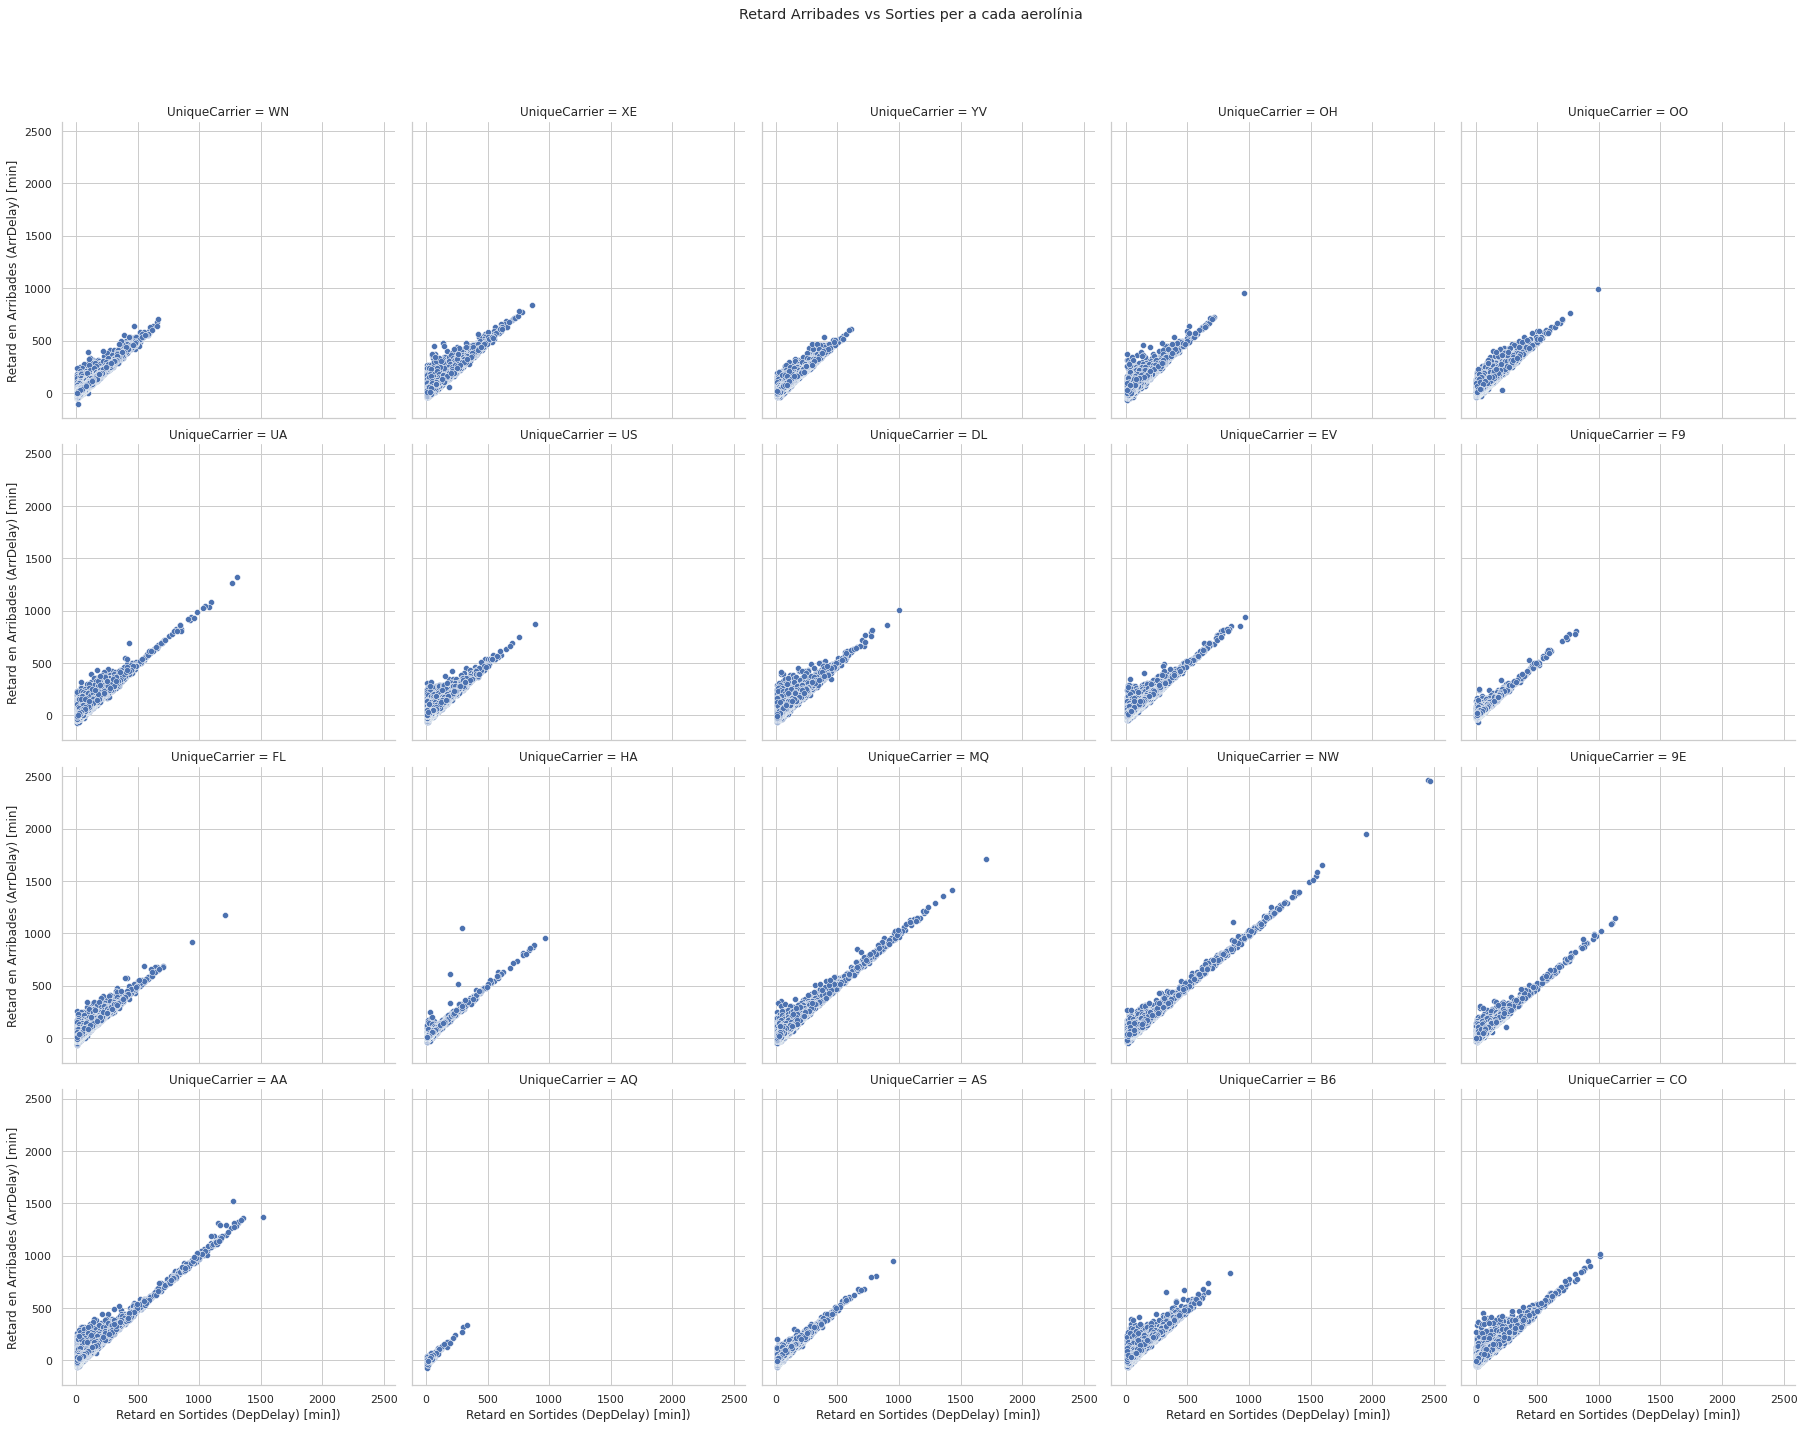

In [17]:
# Nota: he posat cada aerolínia en una gràfica separada perquè si les posava totes
# a la mateixa amb diferents colors, hi havia tantes aerolínies que no s'entenia
# bé i no era útil

imatge5 = sns.relplot(
    data=df, x="DepDelay", y="ArrDelay",
    col="UniqueCarrier", col_wrap=5,
    kind="scatter"
)

imatge5.set_axis_labels('Retard en Sortides (DepDelay) [min])',
                        'Retard en Arribades (ArrDelay) [min]')
imatge5.fig.subplots_adjust(top=0.9)
imatge5.fig.suptitle('Retard Arribades vs Sorties per a cada aerolínia')


totes_imatges["ArrDelay_vs_DepDelay&UniqueCarrier"] = imatge5.fig

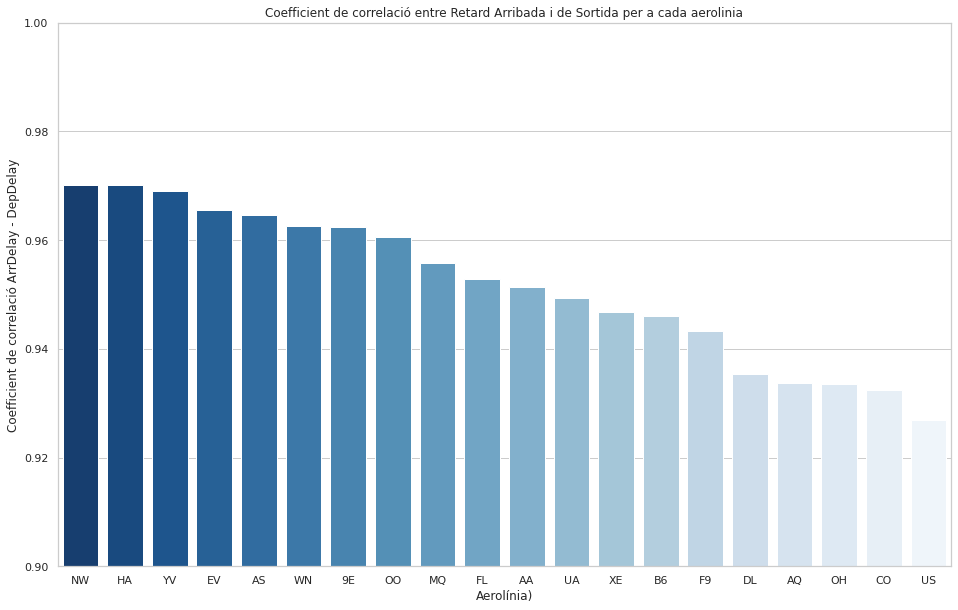

In [18]:
# Com a complement del gràfic anterior, he calculat i representat el coefficient
# de correlació entre ArrDelay i DepDelay per cada aerolínia, ordenades per ordre
# decreixent

corr = df.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].corr().unstack().iloc[:,1].sort_values(ascending=False)
imatge6 = sns.barplot(x=corr.index, y=corr.values, hue=corr.values, palette="Blues", dodge=False)
imatge6.set(ylim=(0.9, 1))
imatge6.legend_.remove()

plt.title('Coefficient de correlació entre Retard Arribada i de Sortida per a cada aerolinia')
plt.xlabel('Aerolínia)')
plt.ylabel('Coefficient de correlació ArrDelay - DepDelay')


totes_imatges["Correlation_ArrDepDelay_vs_UniqueCarrier"] = imatge6.get_figure()

### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

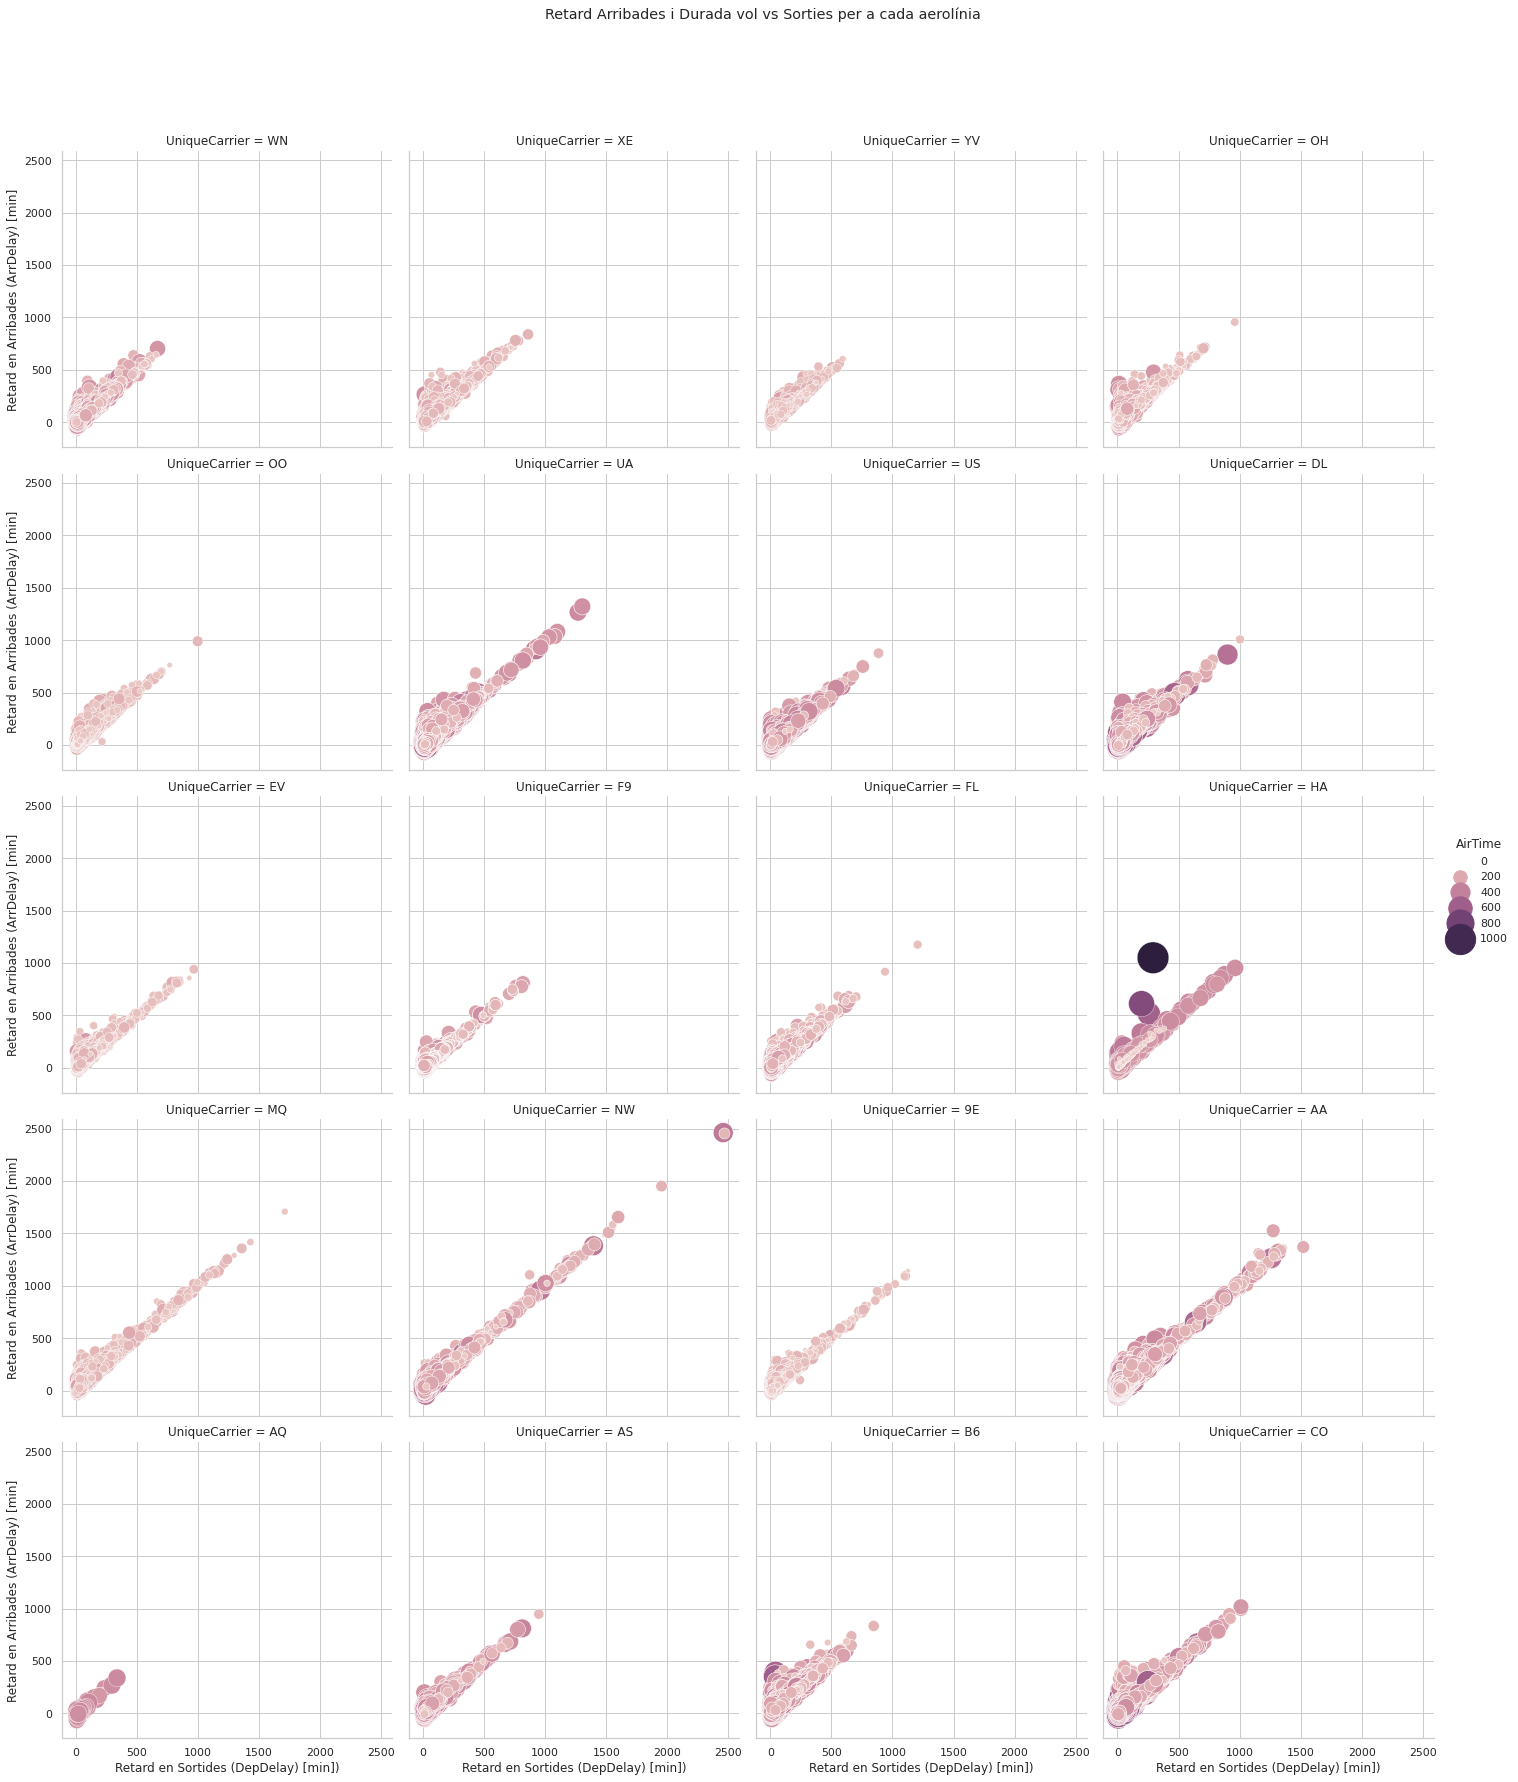

In [19]:
imatge7 = sns.relplot(
    data=df, x="DepDelay", y="ArrDelay",
    col="UniqueCarrier", col_wrap=4,
    kind="scatter",  size="AirTime", hue="AirTime",
    sizes=(0, 1000)
)

imatge7.set_axis_labels('Retard en Sortides (DepDelay) [min]',
                        'Retard en Arribades (ArrDelay) [min]')

imatge7.fig.subplots_adjust(top=0.9)
imatge7.fig.suptitle('Retard Arribades i Durada vol vs Sorties per a cada aerolínia')

totes_imatges["ArrDelay&AirTime_vs_DepDelay_vs_UniqueCarrier"] = imatge7.fig

## Exercici 2
Exporta els gràfics com imatges o com html.

In [38]:
# Exportem totes les imatges en format png
# Iterant sobre els elements del diccionari totes_imatges
for name, figure in totes_imatges.items():
  figure.savefig('/content/drive/MyDrive/ITAcademy/Tasca6/imatges/' + name + '.png',
                 bbox_inches='tight')


Veure carpeta en repositori:  **imatges_exportades**

https://github.com/itacademy-rogergallart/visualitzacio_exploratoria/tree/main/imatges_exportades

##Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [34]:
# Guardar en un CSV
path = '/content/drive/MyDrive/ITAcademy/Tasca6/clean_DelayedFlights2.csv'
df.to_csv(path)

El fitxer és massa gran per posar-lo a Github. Està a aquest link de Google Drive:

https://drive.google.com/file/d/1-7jcpM-I5i4tcVCD6cjQNsJS_F_FZymr/view?usp=sharing



## Exercici 4
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.


Veure notebook en repositori:  **Notebook_tasca5_amb_visualitzacions.ipynb**

https://github.com/itacademy-rogergallart/visualitzacio_exploratoria/blob/main/Notebook_tasca5_amb_visualitzacions.ipynb